# **Import Library**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.2.0
seaborn version :  0.12.2


In [2]:
# Mengubah parameter default matplotlib

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# **Import Dataset**

In [3]:
# load dataset
df = pd.read_csv('Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
# Mengelompokkan feature
num= ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cat = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']

In [10]:
# Summary feature numerical
df[num].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
# Summary feature categorical
df[cat].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


# Stage 2

## **1. Data Cleansing**


### Handle Null and Duplicate Data

In [12]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [4]:
duplicate = df[df.duplicated()]
duplicate

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


- Tidak ada data null maupun duplicate

In [5]:
# Mengelompokkan feature
num= ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cat = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']

In [33]:
import pandas as pd

def outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    outliers_count = {}
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_count[col] = sum(outlier_indices)
        
        count = len(df[col])
        print(f"Column '{col}':")
        print(f"  Total values: {count}")
        print(f"  Outliers: {outliers_count[col]}")
        
    return outliers_count

In [34]:
# Memanggil fungsi outliers
# outliers_count = outliers(DL)
outliers_count = outliers(df)

Column 'ID':
  Total values: 10999
  Outliers: 0
Column 'Customer_care_calls':
  Total values: 10999
  Outliers: 0
Column 'Customer_rating':
  Total values: 10999
  Outliers: 0
Column 'Cost_of_the_Product':
  Total values: 10999
  Outliers: 0
Column 'Prior_purchases':
  Total values: 10999
  Outliers: 1003
Column 'Product_importance':
  Total values: 10999
  Outliers: 0
Column 'Gender':
  Total values: 10999
  Outliers: 0
Column 'Discount_offered':
  Total values: 10999
  Outliers: 2209
Column 'Weight_in_gms':
  Total values: 10999
  Outliers: 0
Column 'Reached.on.Time_Y.N':
  Total values: 10999
  Outliers: 0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def outliers_visual(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(20, 15))
    for i in range(0, len(num_cols)):
        plt.subplot(3, 4, i+1)
        sns.boxplot(x=df[num_cols[i]])

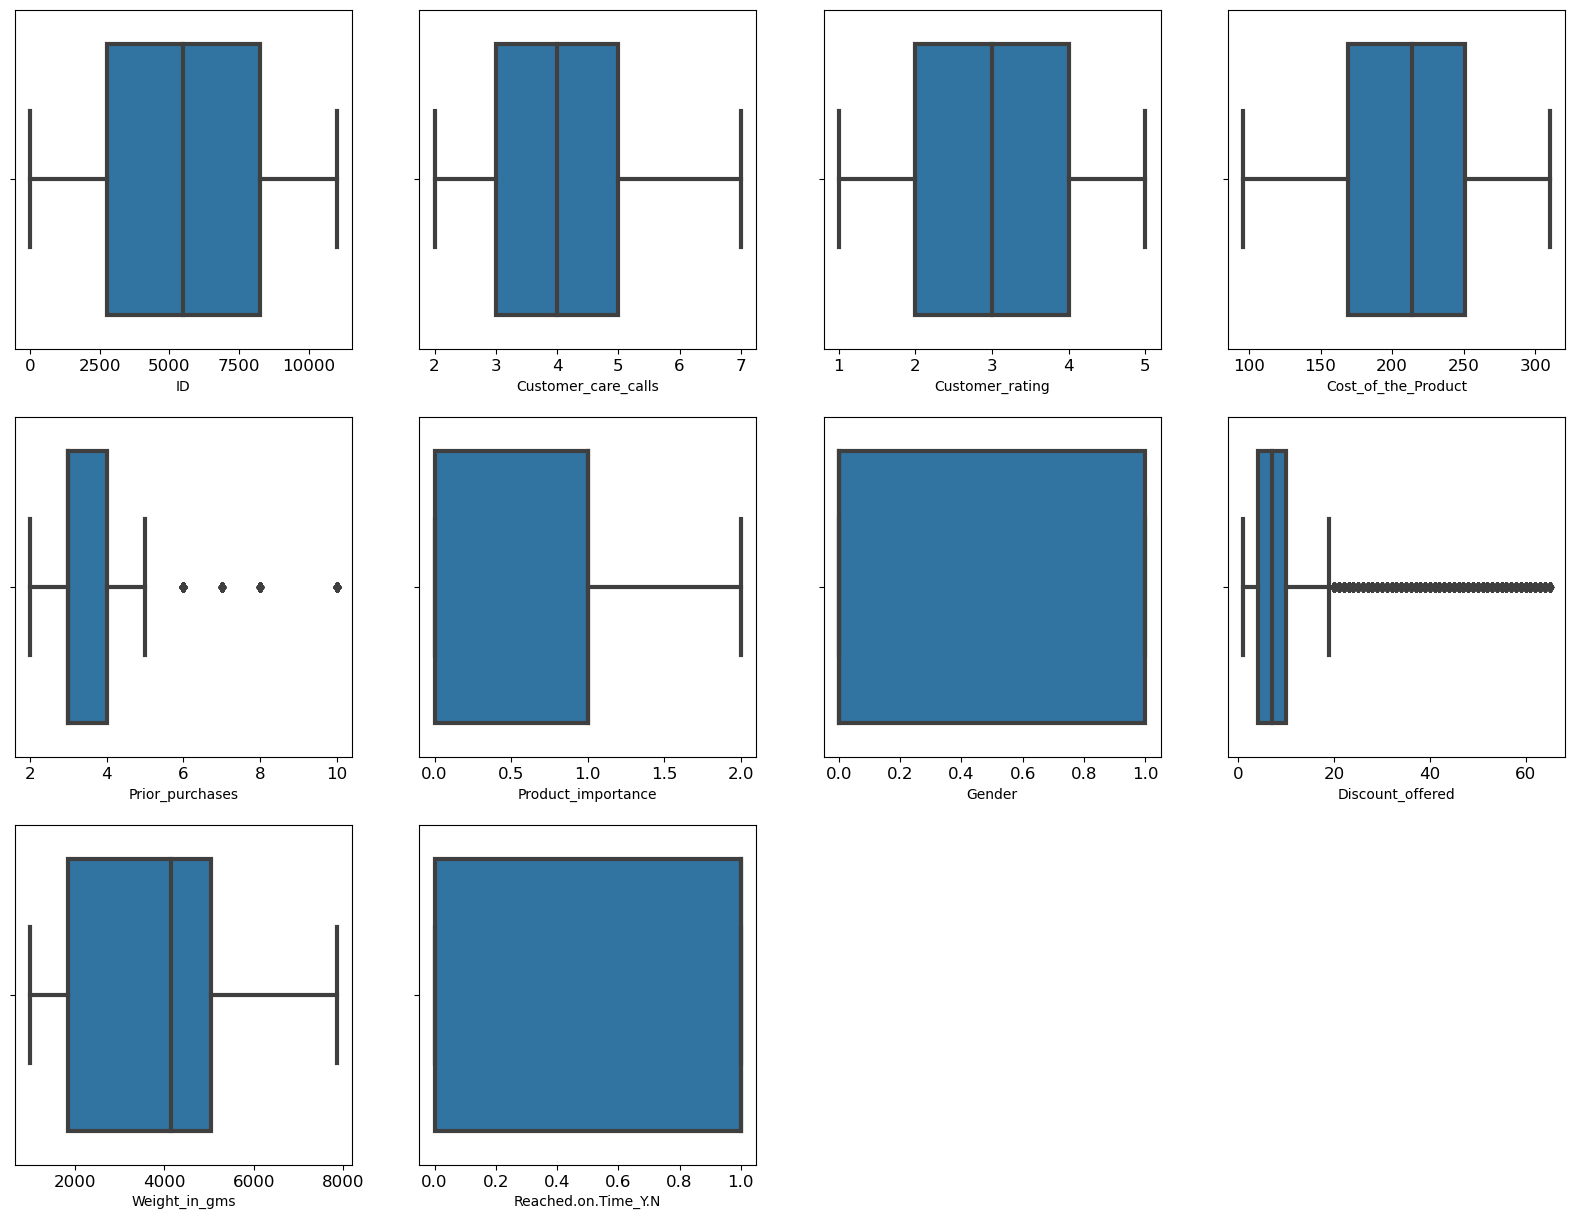

In [36]:
outliers_visual(df)

### Handle Class Imbalance


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


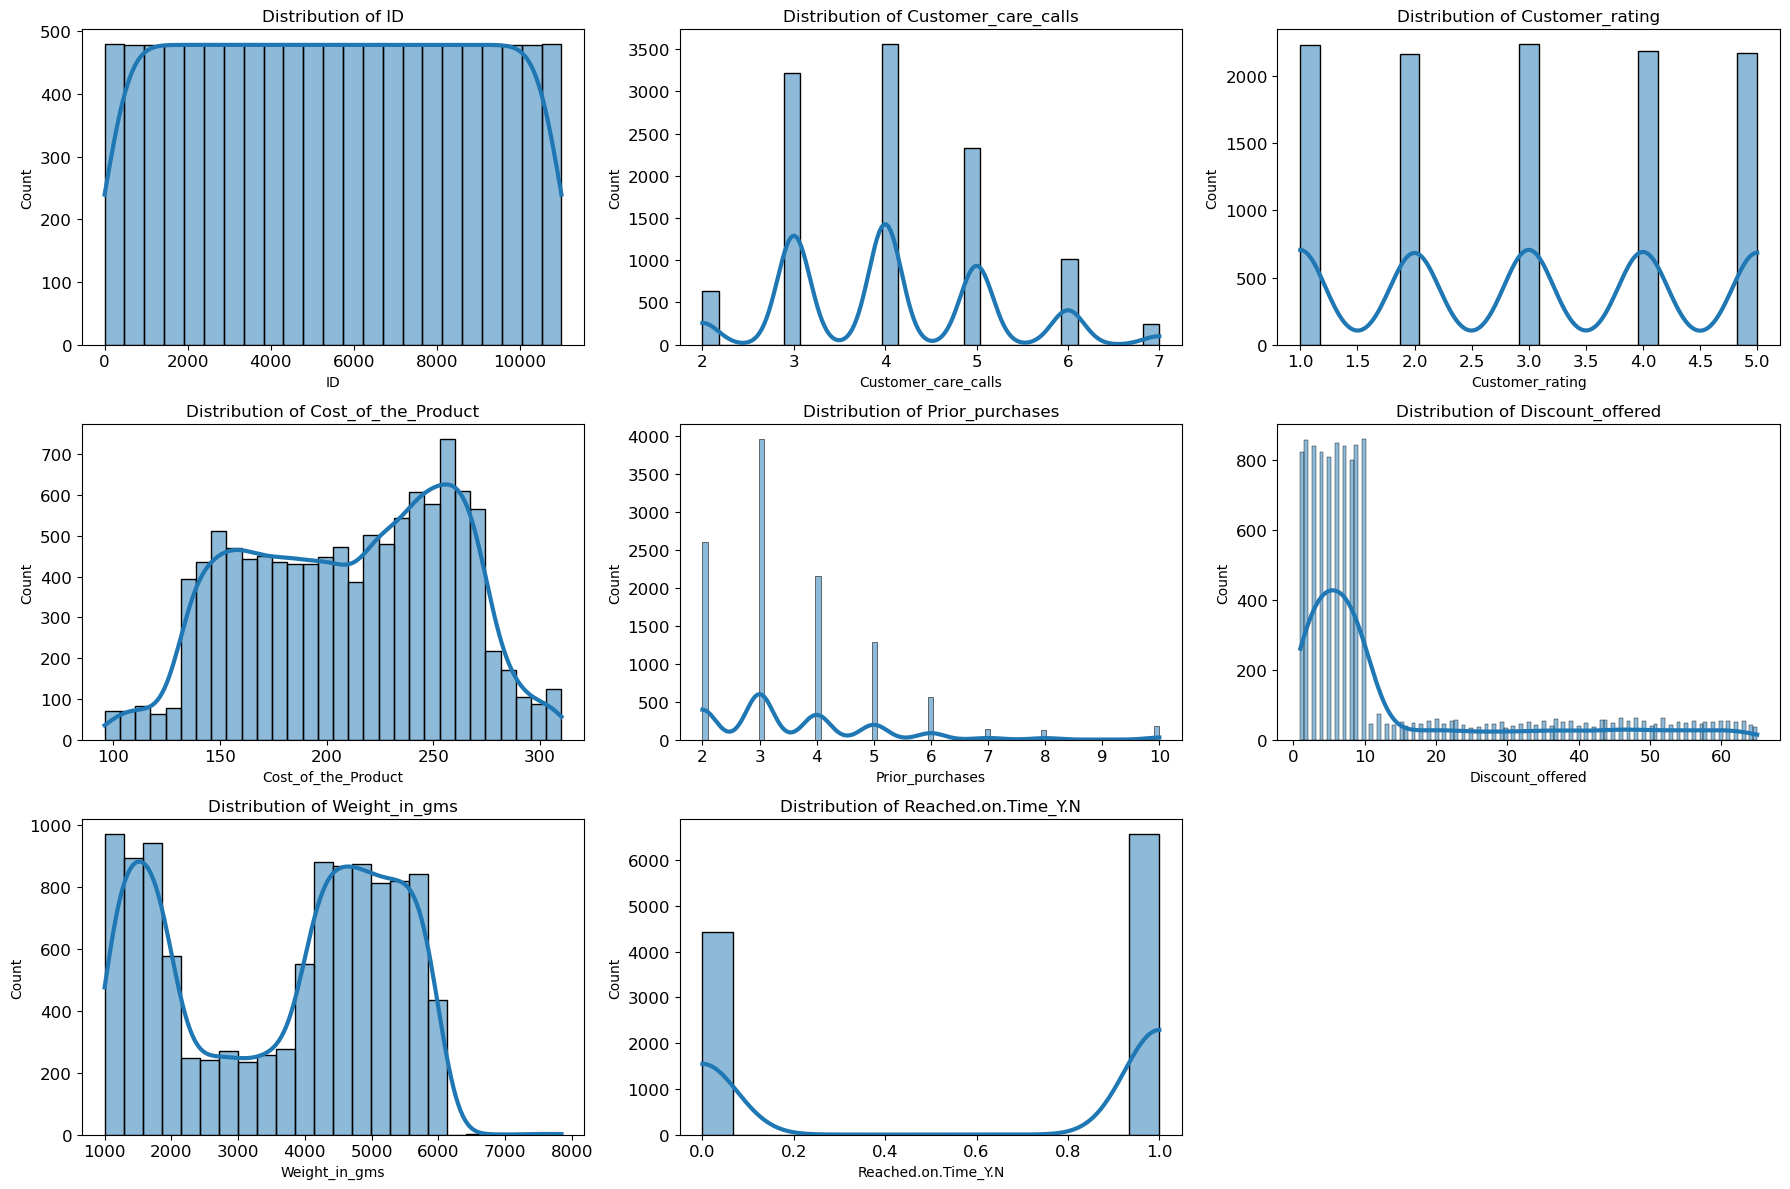

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_distribution(df):
    # Pilih kolom numerik
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Hitung jumlah subplot yang dibutuhkan
    num_plots = len(num_cols)
    num_rows = (num_plots - 1) // 3 + 1  # Menggunakan integer division untuk mendapatkan jumlah baris

    # Visualisasi distribusi fitur numerik
    plt.figure(figsize=(18, 12))
    for i in range(num_plots):
        plt.subplot(num_rows, 3, i+1)  # Menyesuaikan dengan jumlah kolom (3) dan jumlah baris
        sns.histplot(df[num_cols[i]], kde=True)
        plt.title(f'Distribution of {num_cols[i]}')
        plt.tight_layout()

    plt.show()

plot_numeric_distribution(df)


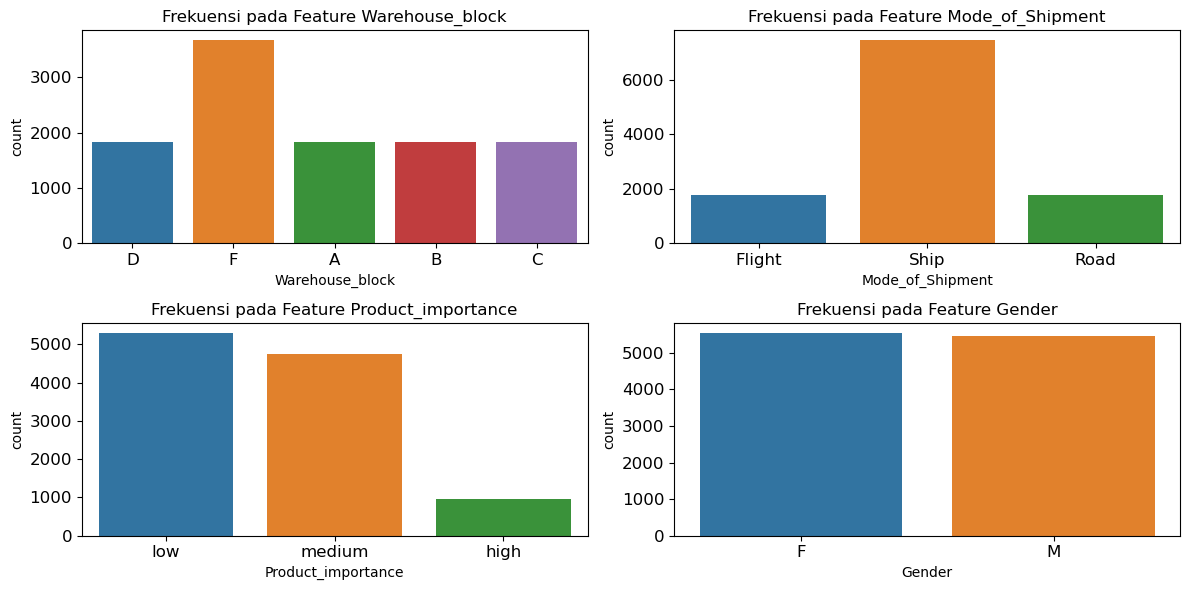

In [9]:
# Distriusi feature kategorikal
plt.figure(figsize = (12,6))
for i in range(0, len(cat)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat[i]])
    plt.title(f'Frekuensi pada Feature {cat[i]}')
    plt.tight_layout()

## **2. Feature Engineering**

In [10]:
# Label Encoding
mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

mapping_Gender = {
    'F' : 0,
    'M' : 1
}

df['Product_importance'] = df['Product_importance'].map(mapping_Product_importance)
df['Gender'] = df['Gender'].map(mapping_Gender)

In [11]:
# One Hot Encoder
for cat in ['Mode_of_Shipment', 'Warehouse_block']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [12]:
df_new = df.drop(columns=['Mode_of_Shipment', 'Warehouse_block'])

In [27]:
df_new.sample(10)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
7805,7806,3,2,219,6,0,0,9,5263,1,True,False,False,False,False,False,False,True
5159,5160,5,2,196,5,0,1,10,5111,0,False,False,True,False,False,False,False,True
4105,4106,3,2,273,3,1,0,2,4948,0,True,False,False,False,False,False,False,True
2920,2921,5,3,157,4,0,1,1,1306,1,False,False,True,False,False,True,False,False
226,227,4,3,161,7,1,1,63,1496,1,False,False,True,False,False,True,False,False
7128,7129,3,3,203,3,1,0,3,4196,0,True,False,False,False,False,False,True,False
2400,2401,2,5,171,3,1,0,13,1101,1,False,False,True,False,False,False,True,False
7949,7950,4,2,201,8,1,0,6,5128,0,True,False,False,False,False,False,False,True
1590,1591,4,1,272,3,1,1,49,2803,1,False,False,True,False,False,False,True,False
5082,5083,3,1,161,3,0,1,9,4865,1,True,False,False,False,False,False,True,False


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       10999 non-null  int64
 1   Customer_care_calls      10999 non-null  int64
 2   Customer_rating          10999 non-null  int64
 3   Cost_of_the_Product      10999 non-null  int64
 4   Prior_purchases          10999 non-null  int64
 5   Product_importance       10999 non-null  int64
 6   Gender                   10999 non-null  int64
 7   Discount_offered         10999 non-null  int64
 8   Weight_in_gms            10999 non-null  int64
 9   Reached.on.Time_Y.N      10999 non-null  int64
 10  Mode_of_Shipment_Flight  10999 non-null  bool 
 11  Mode_of_Shipment_Road    10999 non-null  bool 
 12  Mode_of_Shipment_Ship    10999 non-null  bool 
 13  Warehouse_block_A        10999 non-null  bool 
 14  Warehouse_block_B        10999 non-null  bool 
 15  Wa